Notebook made to Create the FSM using Linear regression.

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
import os 
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.js_functions import adj_rsqaured
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [2]:
df=pd.read_csv("../../Data/Imputed.csv")

In [3]:
df

,HINCP_x,SMOCP,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,ACR_<2.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,4,3.0,890.0,6.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2,3.0,600.0,6.0,35000.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,1,0.0,890.0,1.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,2,2.0,890.0,5.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,3,2.0,20.0,4.0,140.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,1,4.0,0.0,11.0,150000.0,6500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2,3.0,550.0,6.0,145000.0,5750.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,2,4.0,990.0,10.0,500000.0,11500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['HINCP_x', 'SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
       'ACR_<1.0>', 'ACR_<2.0>', 'ACR_<3.0>', 'BUS_<1.0>', 'BUS_<2.0>',
       'BUS_<9.0>', 'FS_<1.0>', 'FS_<2.0>', 'TOIL_<1.0>', 'TOIL_<2.0>',
       'TOIL_<9.0>', 'VEH_<0.0>', 'VEH_<1.0>', 'VEH_<2.0>', 'VEH_<3.0>',
       'VEH_<4.0>', 'VEH_<5.0>', 'VEH_<6.0>', 'YBL_<1.0>', 'YBL_<2.0>',
       'YBL_<3.0>', 'YBL_<4.0>', 'YBL_<5.0>', 'YBL_<6.0>', 'YBL_<7.0>',
       'YBL_<8.0>', 'YBL_<9.0>', 'YBL_<10.0>', 'YBL_<11.0>', 'YBL_<12.0>',
       'YBL_<13.0>', 'YBL_<14.0>', 'YBL_<15.0>', 'YBL_<16.0>', 'YBL_<17.0>',
       'YBL_<18.0>', 'YBL_<19.0>', 'YBL_<20.0>', 'YBL_<21.0>', 'YBL_<22.0>'],
      dtype='object')

In [5]:
#setting our dependent and independent variables
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [10]:
#splitting our data to allow for modeling
X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.score(X_train,y_train)

0.3847594087743529

In [15]:
r2_score=lr.score(X_train,y_train)

In [11]:
scores= cross_val_score(lr,X_train,y_train,cv=5)

In [12]:
scores.mean()

0.38422207389115826

In [27]:
adj_rsqaured(lr,X_train,y_train)

0.3846127393968257

First Initial model is completed and it is performing fairly well, let see how it performs with scaled data.

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [14]:
#instantiating our scalrs
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [15]:
#fitting our standard scalar
X_train_ss=ss_x.fit_transform(X_train)

In [16]:
#fitting out minmax scalar 
X_train_mm=mm_x.fit_transform(X_train)

In [17]:
lr2=LinearRegression()

In [18]:
lr2.fit(X_train_ss,y_train)

LinearRegression()

In [19]:
lr2.score(X_train_ss,y_train)

0.3845465095120181

In [19]:
scores1= cross_val_score(lr2,X_train_ss,y_train,cv=5)

In [20]:
scores1.mean()

0.3842093196532141

The model is performing very simialr to the FSM so scaling does not seem to affect this model to much.

In [21]:
lr3=LinearRegression()

In [22]:
lr3.fit(X_train_mm,y_train)

LinearRegression()

In [23]:
lr3.score(X_train_mm,y_train)

0.3847254983751308

In [24]:
scores2= cross_val_score(lr3,X_train_mm,y_train,cv=5)

In [25]:
scores2.mean()

0.38421017406066965

This model is performing similar to the standard scalar model. These models seem to explain about 40% of the vairance within the data.

Trying OLS Linear regression it has more atrributes to look at for a deeper dive potentially.

In [7]:
df=pd.read_csv("../../Data/Imputed.csv")

In [8]:
df

,HINCP_x,SMOCP,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,ACR_<2.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,4,3.0,890.0,6.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2,3.0,600.0,6.0,35000.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,1,0.0,890.0,1.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,2,2.0,890.0,5.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,3,2.0,20.0,4.0,140.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,1,4.0,0.0,11.0,150000.0,6500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2,3.0,550.0,6.0,145000.0,5750.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,2,4.0,990.0,10.0,500000.0,11500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
fsm_ols=df

In [17]:
pd.set_option('display.max_columns', None)


In [31]:
fsm_ols

,HINCP_x,SMOCP,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_1,ACR_2,...,YBL_13,YBL_14,YBL_15,YBL_16,YBL_17,YBL_18,YBL_19,YBL_20,YBL_21,YBL_22
0,47900.0,1042.0,4,3.0,890.0,6.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2,3.0,600.0,6.0,35000.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,1,0.0,890.0,1.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,2,2.0,890.0,5.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,3,2.0,20.0,4.0,140.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,1,4.0,0.0,11.0,150000.0,6500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2,3.0,550.0,6.0,145000.0,5750.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,2,4.0,990.0,10.0,500000.0,11500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
fsm_ols.columns=['HINCP_x','SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
       'ACR_1', 'ACR_2', 'ACR_3', 'BUS_1', 'BUS_2',
       'BUS_9', 'FS_1', 'FS_2', 'TOIL_1', 'TOIL_2',
       'TOIL_9', 'VEH_0', 'VEH_1', 'VEH_2', 'VEH_3',
       'VEH_4', 'VEH_5', 'VEH_6', 'YBL_1', 'YBL_2',
       'YBL_3', 'YBL_4', 'YBL_5', 'YBL_6', 'YBL_7',
       'YBL_8', 'YBL_9', 'YBL_10', 'YBL_11', 'YBL_12',
       'YBL_13', 'YBL_14', 'YBL_15', 'YBL_16', 'YBL_17',
       'YBL_18', 'YBL_19', 'YBL_20', 'YBL_21', 'YBL_22']

In [22]:
fsm_ols.columns

Index(['HINCP_x', 'SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
       'ACR_1', 'ACR_2', 'ACR_3', 'BUS_1', 'BUS_2', 'BUS_9', 'FS_1', 'FS_2',
       'TOIL_1', 'TOIL_2', 'TOIL_9', 'VEH_0', 'VEH_1', 'VEH_2', 'VEH_3',
       'VEH_4', 'VEH_5', 'VEH_6', 'YBL_1', 'YBL_2', 'YBL_3', 'YBL_4', 'YBL_5',
       'YBL_6', 'YBL_7', 'YBL_8', 'YBL_9', 'YBL_10', 'YBL_11', 'YBL_12',
       'YBL_13', 'YBL_14', 'YBL_15', 'YBL_16', 'YBL_17', 'YBL_18', 'YBL_19',
       'YBL_20', 'YBL_21', 'YBL_22'],
      dtype='object')

In [23]:
fsm_columns=['SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
       'ACR_1', 'ACR_2', 'ACR_3', 'BUS_1', 'BUS_2',
       'BUS_9', 'FS_1', 'FS_2', 'TOIL_1', 'TOIL_2',
       'TOIL_9', 'VEH_0', 'VEH_1', 'VEH_2', 'VEH_3',
       'VEH_4', 'VEH_5', 'VEH_6', 'YBL_1', 'YBL_2',
       'YBL_3', 'YBL_4', 'YBL_5', 'YBL_6', 'YBL_7',
       'YBL_8', 'YBL_9', 'YBL_10', 'YBL_11', 'YBL_12',
       'YBL_13', 'YBL_14', 'YBL_15', 'YBL_16', 'YBL_17',
       'YBL_18', 'YBL_19', 'YBL_20', 'YBL_21', 'YBL_22']

In [24]:
# fsm_columns1=['SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
#        'ACR_1', 'ACR_2', 'ACR_3', 'BUS_1', 'BUS_2',
#        'BUS_9', 'FS_1', 'FS_2', 'TOIL_1', 'TOIL_2',
#        'TOIL_9', 'VEH_0', 'VEH_1', 'VEH_2', 'VEH_3',
#        'VEH_4', 'VEH_5', 'VEH_6', 'YBL_1', 'YBL_2',
#        'YBL_3', 'YBL_4', 'YBL_5', 'YBL_6', 'YBL_7',
#        'YBL_8', 'YBL_9', 'YBL_10', 'YBL_11', 'YBL_12',
#        'YBL_13', 'YBL_14', 'YBL_15', 'YBL_16', 'YBL_17',
#        'YBL_18', 'YBL_19', 'YBL_20', 'YBL_21', 'YBL_22']

In [25]:
predictors = '+'.join(fsm_columns)

In [26]:
predictors

'SMOCP+NP+BDSP+INSP+RMSP+VALP+TAXAMT+ACR_1+ACR_2+ACR_3+BUS_1+BUS_2+BUS_9+FS_1+FS_2+TOIL_1+TOIL_2+TOIL_9+VEH_0+VEH_1+VEH_2+VEH_3+VEH_4+VEH_5+VEH_6+YBL_1+YBL_2+YBL_3+YBL_4+YBL_5+YBL_6+YBL_7+YBL_8+YBL_9+YBL_10+YBL_11+YBL_12+YBL_13+YBL_14+YBL_15+YBL_16+YBL_17+YBL_18+YBL_19+YBL_20+YBL_21+YBL_22'

In [27]:
formula="HINCP_x ~ " + predictors

In [28]:
# formula="HINCP_x ~ SMOCP + NP + BDSP + INSP + RMSP + VALP+ TAXAMT"

In [29]:
fsm=ols(formula=formula,data=fsm_ols).fit()

In [30]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HINCP_x   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     3778.
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:54:13   Log-Likelihood:            -3.1105e+06
No. Observations:              246502   AIC:                         6.221e+06
Df Residuals:                  246460   BIC:                         6.221e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2121.9530    898.130     -2.363      0.018   -3882.265    -361.641
SMOCP         21.5497      0.257     83.795      0.000      21.046      22.054
NP          4533.4091    129.666     34.962      0.000    4279.268    4787.551
BDSP        -108.8948    224.253     -0.486      0.627    -548.425     330.635
INSP           2.0003      0.266      7.532      0.000       1.480       2.521
RMSP        3289.4376     98.812     33.290      0.000    3095.768    3483.107
VALP           0.0756      0.001     88.729      0.000       0.074       0.077
TAXAMT         3.4596      0.072     48.197      0.000       3.319       3.600
ACR_1       2978.5407    461.677      6.452      0.000    2073.667    3883.415
ACR_2      -1407.8686    531.710     -2.648      0.008   -2450.006    -365.731
ACR_3      -3692.6251    754.377     -4.895      0.000   -5171.184   -2214.067
BUS_1      -5696.2061   1646.950     -3.459      0.001   -8924.185   -2468.228
BUS_2       1215.8020    773.538      1.572      0.116    -300.312    2731.916
BUS_9       2358.4512    803.443      2.935      0.003     783.724    3933.179
FS_1       -1.789e+04    534.613    -33.457      0.000   -1.89e+04   -1.68e+04
FS_2        1.576e+04    490.445     32.144      0.000    1.48e+04    1.67e+04
TOIL_1       -32.9513   1734.499     -0.019      0.985   -3432.523    3366.621
TOIL_2     -4605.7957   4149.291     -1.110      0.267   -1.27e+04    3526.706
TOIL_9      2516.7940   1752.856      1.436      0.151    -918.758    5952.346
VEH_0      -3.072e+04    637.119    -48.225      0.000    -3.2e+04   -2.95e+04
VEH_1      -2.329e+04    484.103    -48.100      0.000   -2.42e+04   -2.23e+04
VEH_2      -4497.8879    448.905    -10.020      0.000   -5377.729   -3618.047
VEH_3       5611.1253    524.802     10.692      0.000    4582.528    6639.723
VEH_4       1.268e+04    735.565     17.242      0.000    1.12e+04    1.41e+04
VEH_5       1.658e+04   1279.182     12.960      0.000    1.41e+04    1.91e+04
VEH_6       2.151e+04   1894.068     11.359      0.000    1.78e+04    2.52e+04
YBL_1      -9075.4441    968.249     -9.373      0.000    -1.1e+04   -7177.702
YBL_2       -1.19e+04   1074.831    -11.075      0.000    -1.4e+04   -9796.694
YBL_3      -1.341e+04    997.634    -13.438      0.000   -1.54e+04   -1.15e+04
YBL_4      -1.287e+04   1007.007    -12.784      0.000   -1.48e+04   -1.09e+04
YBL_5      -1.207e+04    989.113    -12.199      0.000    -1.4e+04   -1.01e+04
YBL_6      -8770.4624   1029.893     -8.516      0.000   -1.08e+04   -6751.899
YBL_7      -5772.9952   1008.684     -5.723      0.000   -7749.989   -3796.001
YBL_8      -4997.5150   1090.098     -4.584      0.000   -7134.078   -2860.952
YBL_9      -2619.5362   1536.701     -1.705      0.088   -5631.429     392.357
YBL_10     -2261.7338   1607.920     -1.407      0.160   -5413.214     889.746
YB

Time for Assumptions check

Linearity

In [159]:
from statsmodels.stats.diagnostic import linear_rainbow,het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

rainbow_statisic, rainbow_p_value=linear_rainbow(fsm)
print("Rainbow Statistic:",rainbow_statisic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow Statistic: 1.0192281965960717
Rainbow p-value: 0.0004142403457628813


Normality

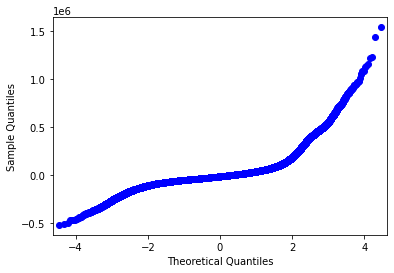

In [160]:
fsm_resids=fsm.resid

import statsmodels.api as sm
sm.qqplot(fsm_resids);

Homoscadaacity

In [161]:
y_hat=fsm.predict()


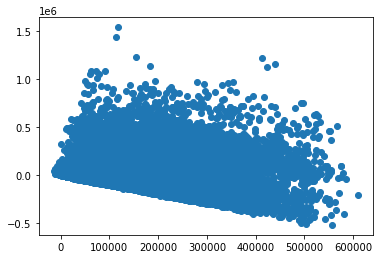

In [162]:
plt.scatter(y_hat,fsm_resids);

In [149]:
lm, lm_p_value, fvalue,f_p_value=het_breuschpagan(fsm_resids,fsm_ols[["TAXAMT"]])
print("Lagrange Multipler p-value:", lm_p_value)
print("F-Statistic p-value:",f_p_value)

Lagrange Multipler p-value: nan
F-Statistic p-value: 0.0
